<a href="https://colab.research.google.com/github/naochien/climateriskscore/blob/main/Copy_of_Emna_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install highspy matplotlib cartopy xarray==2024.9.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.3 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.11.0
    Uninstalling xarray-2025.11.0:
      Successfully uninstalled xarray-2025.11.0


In [ ]:
%pip install pypsa==0.35.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.3/267.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.5 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.1.2
    Uninstalling shapely-2.1.2:
      Successfully uninstalled shapely-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.7.0 requires shapely>=2.1.0, but you have shapely 2.0.7 which is incompatible.
esda 2.8.0 requires shapely>=2.1, but you have shapely 2.0.7 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pypsa
import matplotlib.pyplot as plt
n = pypsa.Network('/content/drive/MyDrive/elec_s75_c33_ec_lv1.0_REM-3h_E_v2.nc')
#n = pypsa.Network('/content/elec_s75_c33_ec_lv1.0_REM-3h_E_v2.nc')

In [ ]:
n.buses.head(2)

,v_nom,type,x,y,carrier,unit,location,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,...,sub_network,country,reeds_zone,reeds_ba,interconnect,nerc_reg,trans_reg,trans_grp,reeds_state,substation_lv
Bus,,,,,,,,,,,,,,,,,,,,,
p1,230.0,,-121.532628,47.793525,AC,,,1.0,0.0,inf,...,,p1,p1,BPAT,western,WECC_NWPP,NorthernGrid,NorthernGrid_West,WA,True
p10,230.0,,-117.833295,34.355949,AC,,,1.0,0.0,inf,...,,p10,p10,CISO,western,WECC_CA,CAISO,CAISO,CA,True


In [ ]:
n.generators.head(2)

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt,vom_cost,fuel_cost,heat_rate,carrier_base
Generator,,,,,,,,,,,,,,,,,,,,,
p1 CCGT existing,p1,Slack,,620.200012,0.0,True,0.0,620.200012,0.0,1.0,...,1.0,1.0,1.0,1.0,8.0,0.0,2.14,22.921077,6.332,CCGT
p1 OCGT existing,p1,,,320.599998,0.0,True,0.0,320.599998,0.0,1.0,...,1.0,1.0,1.0,1.0,6.0,0.0,6.94,29.204940,9.717,OCGT


In [ ]:
n.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,


In [ ]:
n.loads.head(2)

,bus,carrier,type,p_set,q_set,sign,active
Load,,,,,,,
p1 AC,p1,AC,,0.0,0.0,-1.0,True
p10 AC,p10,AC,,0.0,0.0,-1.0,True


In [ ]:
n.storage_units

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,max_hours,efficiency_store,efficiency_dispatch,standing_loss,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
p1 battery,p1,,,3.000000,0.0,True,0.0,3.000000,-1.0,1.0,...,False,NaN,True,True,1.933333,0.948683,0.948683,0.0,0.0,0.0
p10 battery,p10,,,6186.500003,0.0,True,0.0,6186.500003,-1.0,1.0,...,False,NaN,True,True,3.296711,0.948683,0.948683,0.0,0.0,0.0
p11 battery,p11,,,641.500000,0.0,True,0.0,641.500000,-1.0,1.0,...,False,NaN,True,True,2.592206,0.948683,0.948683,0.0,0.0,0.0
p12 battery,p12,,,178.000000,0.0,True,0.0,178.000000,-1.0,1.0,...,False,NaN,True,True,3.578652,0.948683,0.948683,0.0,0.0,0.0
p13 battery,p13,,,865.000000,0.0,True,0.0,865.000000,-1.0,1.0,...,False,NaN,True,True,1.716763,0.948683,0.948683,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p59 8hr_battery_storage_2024,p59,PQ,,0.000000,0.0,True,0.0,inf,-1.0,1.0,...,False,NaN,False,True,8.000000,0.921954,0.921954,0.0,0.0,0.0
p6 8hr_battery_storage_2024,p6,PQ,,0.000000,0.0,True,0.0,inf,-1.0,1.0,...,False,NaN,False,True,8.000000,0.921954,0.921954,0.0,0.0,0.0
p7 8hr_battery_storage_2024,p7,PQ,,0.000000,0.0,True,0.0,inf,-1.0,1.0,...,False,NaN,False,True,8.000000,0.921954,0.921954,0.0,0.0,0.0


In [ ]:
n.links

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt,underwater_fraction
Link,,,,,,,,,,,,,,,,,,,,,
9,p25,p10,,DC,1.0,True,0,inf,2300.000,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,0.0,0.0
10,p2,p10,,DC,1.0,True,0,inf,3000.000,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,0.0,0.0
p1||p2,p1,p2,,AC,1.0,True,0,inf,8287.031,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,0.0,NaN
p1||p4,p1,p4,,AC,1.0,True,0,inf,9136.039,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,0.0,NaN
p2||p3,p2,p3,,AC,1.0,True,0,inf,796.505,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p29||p30exp,p29,p30,,AC,1.0,True,0,inf,0.000,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,0.0,NaN
p29||p31exp,p29,p31,,AC,1.0,True,0,inf,0.000,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,0.0,NaN
p31||p34exp,p31,p34,,AC,1.0,True,0,inf,0.000,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,0.0,NaN


In [ ]:
print("Buses:", len(n.buses))
print(n.buses.head())

print("\nGenerators:", len(n.generators))
print(n.generators.head())

print("\nLoads:", len(n.loads))
print(n.loads.head())

print("\nStorage units:", len(n.storage_units))
print(n.storage_units.head())

print("\nLinks:", len(n.links))  # Sometimes used instead of lines
print(n.links.head())

print("\nSnapshots:", len(n.snapshots))
print(n.snapshots[:5])

Buses: 33
     v_nom type           x          y carrier unit location  v_mag_pu_set  \
Bus                                                                          
p1   230.0      -121.532628  47.793525      AC                         1.0   
p10  230.0      -117.833295  34.355949      AC                         1.0   
p11  230.0      -117.125695  32.911840      AC                         1.0   
p12  230.0      -118.359806  39.454125      AC                         1.0   
p13  230.0      -115.026234  36.185554      AC                         1.0   

     v_mag_pu_min  v_mag_pu_max  ... sub_network country reeds_zone reeds_ba  \
Bus                              ...                                           
p1            0.0           inf  ...                  p1         p1     BPAT   
p10           0.0           inf  ...                 p10        p10     CISO   
p11           0.0           inf  ...                 p11        p11     CISO   
p12           0.0           inf  ...       

In [ ]:
CA_buses = n.buses[n.buses['reeds_state'] == 'CA']
CA_generators = n.generators[n.generators['bus'].isin(CA_buses.index)]


CA_loads = n.loads[n.loads['bus'].isin(CA_buses.index)]

# CA storage
CA_storage = n.storage_units[n.storage_units['bus'].isin(CA_buses.index)]

# CA links (where either end is in CA)
CA_links = n.links[
    n.links['bus0'].isin(CA_buses.index) |
    n.links['bus1'].isin(CA_buses.index)
]


In [ ]:
# View all transmission links
print(n.links[['bus0', 'bus1', 'p_nom', 'carrier', 'efficiency']])

# Identify which buses are most connected (potential vulnerability points)
import pandas as pd

bus_connections = pd.concat([
    n.links['bus0'].value_counts(),
    n.links['bus1'].value_counts()
], axis=1).fillna(0)
bus_connections.columns = ['outgoing', 'incoming']
bus_connections['total'] = bus_connections.sum(axis=1)
print("\nMost connected buses:")
print(bus_connections.sort_values('total', ascending=False).head(10))

            bus0 bus1     p_nom carrier  efficiency
Link                                               
9            p25  p10  2300.000      DC         1.0
10            p2  p10  3000.000      DC         1.0
p1||p2        p1   p2  8287.031      AC         1.0
p1||p4        p1   p4  9136.039      AC         1.0
p2||p3        p2   p3   796.505      AC         1.0
...          ...  ...       ...     ...         ...
p29||p30exp  p29  p30     0.000      AC         1.0
p29||p31exp  p29  p31     0.000      AC         1.0
p31||p34exp  p31  p34     0.000      AC         1.0
p31||p59exp  p31  p59     0.000      AC         1.0
p33||p34exp  p33  p34     0.000      AC         1.0

[134 rows x 5 columns]

Most connected buses:
     outgoing  incoming  total
p25       9.0       6.0   15.0
p15       4.0      10.0   14.0
p28       6.0       8.0   14.0
p5        8.0       4.0   12.0
p10       8.0       4.0   12.0
p17       4.0       8.0   12.0
p2        9.0       2.0   11.0
p18       8.0       2.0   10.

/tmp/ipython-input-2913076071.py:15: DeprecatedWarning:

plot is deprecated as of 0.34 and will be removed in 1.0. Use `n.plot.map()` as a drop-in replacement instead.



/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip



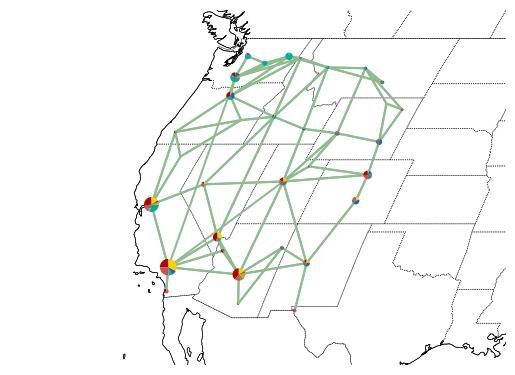

In [ ]:
from pypsa.plot import add_legend_patches
import cartopy.crs as ccrs
import random
import cartopy.feature as cfeature
import geopandas as gpd

carriers = n.generators.carrier.unique()
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in carriers]
n.add("Carrier", carriers, color=colors)

fig = plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
capacities = n.generators.groupby(["bus", "carrier"]).p_nom.sum()

n.plot(
    ax=ax,
    bus_sizes=capacities / 2e5,
    margin=0.2
)

ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)
ax.coastlines(linewidth=0.5) # Optional: add coastlines

#add_legend_patches(ax, colors, carriers)

In [ ]:
n.statistics()

ValueError: cannot join with no overlapping index names

In [ ]:
n.buses.head()

In [ ]:
n.generators_t.p

In [ ]:
n.components.buses.dynamic.p

In [ ]:
n.generators_t.p_max_pu = n.generators_t.p_max_pu.fillna(0.0)


##Attempt to run optimizer on only June and July (partially for summer months, partially to avoid Feb 29th problem)

In [ ]:
print(type(n.snapshots))
print(n.snapshots.names)
print(n.snapshots.get_level_values(-1).dtype)



<class 'pandas.core.indexes.multi.MultiIndex'>
['period', 'timestep']
datetime64[ns]


In [ ]:
import pandas as pd

snapshots = n.snapshots

# get the datetime level (usually second level)
dt = snapshots.get_level_values(-1)

mask = (
    (dt >= pd.Timestamp("2024-06-01")) &
    (dt <= pd.Timestamp("2024-07-31 23:59:59"))
)

# filter n snapshots
n.snapshots = snapshots[mask]

##Following Youtube Instructions

In [ ]:
n.generators_t.p_max_pu.head(3)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
n.loads_t.p_set.iloc[:200].plot(ax=ax)
plt.xticks(rotation=45, ha='right') # Rotate labels by 45 degrees and align to the right

In [ ]:
n.optimize(n.snapshots[:12], solver_name="highs")

In [ ]:
n.snapshots

##Following PyPsa documentation

In [ ]:
n.generators_t.p_max_pu.iloc[0:]

In [ ]:
p_max_pu = n.generators_t.p_max_pu.droplevel("period")

In [ ]:
p_max_pu

In [ ]:
start_date = "2024-06-01 00:00:00"
end_date = "2024-07-31 23:00:00"
starting_generator = "p1 CCGT"
ending_generator = "p1 solar"

p_max_pu_select = p_max_pu.loc[start_date:end_date, starting_generator:ending_generator]
p_max_pu_select.plot(ylabel="Capacity Factor")

In [ ]:
import pandas as pd

# Get the period value from the current n snapshots
# Assuming all snapshots belong to the same period, which appears to be 2024
period_value = n.snapshots.get_level_values(0)[0]

# Reconstruct the MultiIndex with 'period' and 'timestep' for the selected range
new_snapshots_multiindex = pd.MultiIndex.from_arrays(
    [[period_value] * len(p_max_pu_select.index), p_max_pu_select.index],
    names=['period', 'timestep']
)

n.set_snapshots(new_snapshots_multiindex)

In [ ]:
from copy import deepcopy
n.model.solver_model = None
m = deepcopy(n)


In [ ]:
n.optimize(solver_name = 'highs', log_to_console=False)

In [ ]:
n.components.buses.dynamic.p[n.components.buses.dynamic.p["p1"] != 0].head()

In [ ]:
n.components.buses.dynamic.p.plot()
plt.xticks(rotation=45, ha='right') # Rotate labels by 45 degrees and align to the right

In [ ]:
n.buses_t.marginal_price

In [ ]:
nhours = 200
fig, ax = plt.subplots(figsize=(20, 5))

# Plot the marginal price for each bus
n.buses_t.marginal_price.iloc[300:310, :10].plot(ax=ax)

ax.set_ylabel("LMP ($/MWh)")
ax.set_xlabel("Time")
ax.set_title("Locational Marginal Prices (LMPs) for First {} Hours".format(nhours))
ax.legend(loc="upper left", frameon=False)
plt.xticks(rotation=45, ha='right') # Rotate labels by 45 degrees and align to the right

In [ ]:
# Dispatch Plot of first 200 hours
nhours = 200
fig, ax = plt.subplots(figsize=(20, 5))
p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3).iloc[:nhours]
p_by_carrier.plot(
    kind="area",
    ax=ax,
    linewidth=0,
    cmap="tab20b",
)
ax.legend(ncol=5, loc="upper left", frameon=False)
ax.set_ylabel("GW")
plt.xticks(rotation=45, ha='right') # Rotate labels by 45 degrees and align to the right

In [ ]:
n.buses["reeds_state"]

In [ ]:
n.loads.index = pd.Index(map(lambda x: str(x)[:-2], n.loads.index))
n.loads["state"] = n.buses["reeds_state"]
n.loads

In [ ]:
loads_by_bus = n.loads_t.p.droplevel("period")
loads_by_bus.index = pd.Index(map(lambda x: str(x)[:-2], loads_by_bus.index))

In [ ]:
loads_by_bus.plot()

In [ ]:
n.statistics.energy_balance()

In [ ]:
n.buses.groupby(["reeds_state"])

n.buses.

In [ ]:
n.buses.groupby("reeds_state").plot()

# Task
Re-execute the code in cell `pC_nmoFZ9rrV` to ensure the solver model is cleared before copying the network.

## Modify cell pC_nmoFZ9rrV

### Subtask:
Re-execute the code in cell pC_nmoFZ9rrV to ensure the solver model is cleared before copying the network.


## Summary:

No Q&A, key findings, or insights/next steps are available for this procedural step. The task involved re-executing a specific cell to clear a solver model, which is an operational action rather than a data analysis task yielding findings.


# Task
Re-execute cell `pC_nmoFZ9rrV`.

## Re-execute cell pC_nmoFZ9rrV

### Subtask:
Re-execute cell `pC_nmoFZ9rrV` to ensure the solver model is cleared before copying the network.


## Summary:

### Insights or Next Steps
*   The cell `pC_nmoFZ9rrV` was re-executed. This action was taken to clear the solver model, which is a necessary prerequisite before proceeding with copying the network.


# Task
Extract bus names from the `basecase_loads` DataFrame columns, create a mapping from bus names to `reeds_state` using the `bus_regions` Series, group the `basecase_loads` by their corresponding `reeds_state` and sum the loads, and then display the head of the resulting DataFrame.

## Extract bus names from load columns

### Subtask:
Extract the bus identifier from each load column in `basecase_loads` (e.g., 'p1 AC' becomes 'p1').


**Reasoning**:
To extract the bus identifiers from the `basecase_loads` DataFrame columns, I need to remove the ' AC' suffix from each column name. This can be done by applying a string replacement method to the DataFrame's column index.



In [ ]:
load_buses = basecase_loads.columns.str.replace(' AC', '')
print("Extracted load bus names:")
print(load_buses.head())

**Reasoning**:
The previous code failed because `load_buses` is a Pandas Index object, which does not have a `.head()` method directly. To display the first few elements of the Index, I will slice it using `[:5]`.



In [ ]:
load_buses = basecase_loads.columns.str.replace(' AC', '')
print("Extracted load bus names:")
print(load_buses[:5])

**Reasoning**:
Now that the bus names have been extracted, the next step is to create a mapping between these bus names and their corresponding 'reeds_state' using the `bus_regions` Series. This will allow for grouping loads by state.



In [ ]:
bus_to_state_mapping = bus_regions.loc[load_buses]
print("Mapping of load buses to reeds_state (first 5 entries):")
print(bus_to_state_mapping.head())

**Reasoning**:
The previous code failed because the `bus_regions` variable was not defined in the current execution scope. I need to re-execute the cell where `bus_regions` was defined to make it available for use.



In [ ]:
bus_regions = n.buses["reeds_state"]
bus_to_state_mapping = bus_regions.loc[load_buses]
print("Mapping of load buses to reeds_state (first 5 entries):")
print(bus_to_state_mapping.head())

**Reasoning**:
Now that the mapping from load bus names to their respective `reeds_state` has been established, the next logical step is to group the `basecase_loads` DataFrame by these states and sum the load values for each state across all time steps. This will provide aggregated load data per state.



In [ ]:
loads_by_state = basecase_loads.groupby(bus_to_state_mapping, axis=1).sum()
print("Aggregated loads by reeds_state (first 5 entries and first 5 rows):")
print(loads_by_state.head())

**Reasoning**:
The previous `groupby(axis=1)` operation failed to aggregate the loads correctly and raised a `FutureWarning`. To fix this, I will transpose the `basecase_loads` DataFrame, group by the `bus_to_state_mapping`, sum the results, and then transpose back to get the aggregated loads by state with timesteps as the index, as suggested by the warning.



In [ ]:
loads_by_state = basecase_loads.T.groupby(bus_to_state_mapping).sum().T
print("Aggregated loads by reeds_state (first 5 entries and first 5 rows):")
print(loads_by_state.head())

**Reasoning**:
The previous grouping by state failed because the grouping key (bus_to_state_mapping) had an index that didn't directly match the columns of the `basecase_loads` DataFrame. To resolve this, I need to create a new mapping where the index aligns with `basecase_loads.columns` ('p1 AC', 'p10 AC', etc.) and the values are the corresponding `reeds_state`. I will achieve this by first creating a temporary Series to map the load column names to their base bus names, then mapping these base bus names to their `reeds_state` using `bus_regions`.



In [ ]:
load_column_to_bus_name = pd.Series(load_buses, index=basecase_loads.columns)
final_state_mapping = load_column_to_bus_name.map(bus_regions)

loads_by_state = basecase_loads.groupby(final_state_mapping, axis=1).sum()
print("Aggregated loads by reeds_state (first 5 entries and first 5 rows):")
print(loads_by_state.head())